### Implementing Logistic Regression for Binary Classification in Bank-Loan Dataset

Identity: 
- Azis Muslim
- Data Scientist

In this research I will be using logistic regression for binary classification. The purpose of this research was to predict good or bad loan. logistic regression was the very common machine learning algorithm that was used for classification problem because it was simple and also capable for multi class classifications. The target varibale in this research was loan condition. Loan condition represent solvency of borrower. If it's have good label it might indicates solvency and if it's have bad label then it might indicates insolvency. To make the preditions accurate I would like to select features that might affect the target variable.

In the machine learning side I would use Principle Compoment Analysis to make the logistic regression run faster and I also use "smote" as a technique to handle imbalanced target variable. The expected result from the research was to build machine learning model that could predicit good or bad loan in high accuracy.

In [108]:
# Library that was used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score
import warnings
warnings.filterwarnings('ignore') 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

### Loading Dataset

In [74]:
# This code was run to load dataset
df = pd.read_csv("loan_final313.csv")
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


From  the dataset that was run above I got the information that the dataset consisted from 8.87.379 rows and 30 columns. I could assign this dataset as high dimentional dataset because it has 30 features and to simplify the analysis later on I was going to use Principal Component Analysis to reduce the dimension of the dataset.In addition this dataset was also time series.

In [75]:
# Load dataset dari lima kolom paling atas
df.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [76]:
# Load dataset dari lima kolom paling bawah
df.tail(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.88,2944.53,0.0,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.39,7066.74,0.0,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.74,1844.50,0.0,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.67,1552.69,0.0,317.86,Northern-Irl
887378,36271262,2015,01/01/2015,1012016,10.0,RENT,1,Low,100000,1,...,0,11.99,B,2,10.83,7943.76,5889.06,0.0,664.20,leinster


### Explanatory Data Analysis

In this part was about to break down each features in the dataset to get insight from the data. Analyzing feature importances through heatmat were important but to ilustrate specific result of it I would like to show the relationship for the specific features.

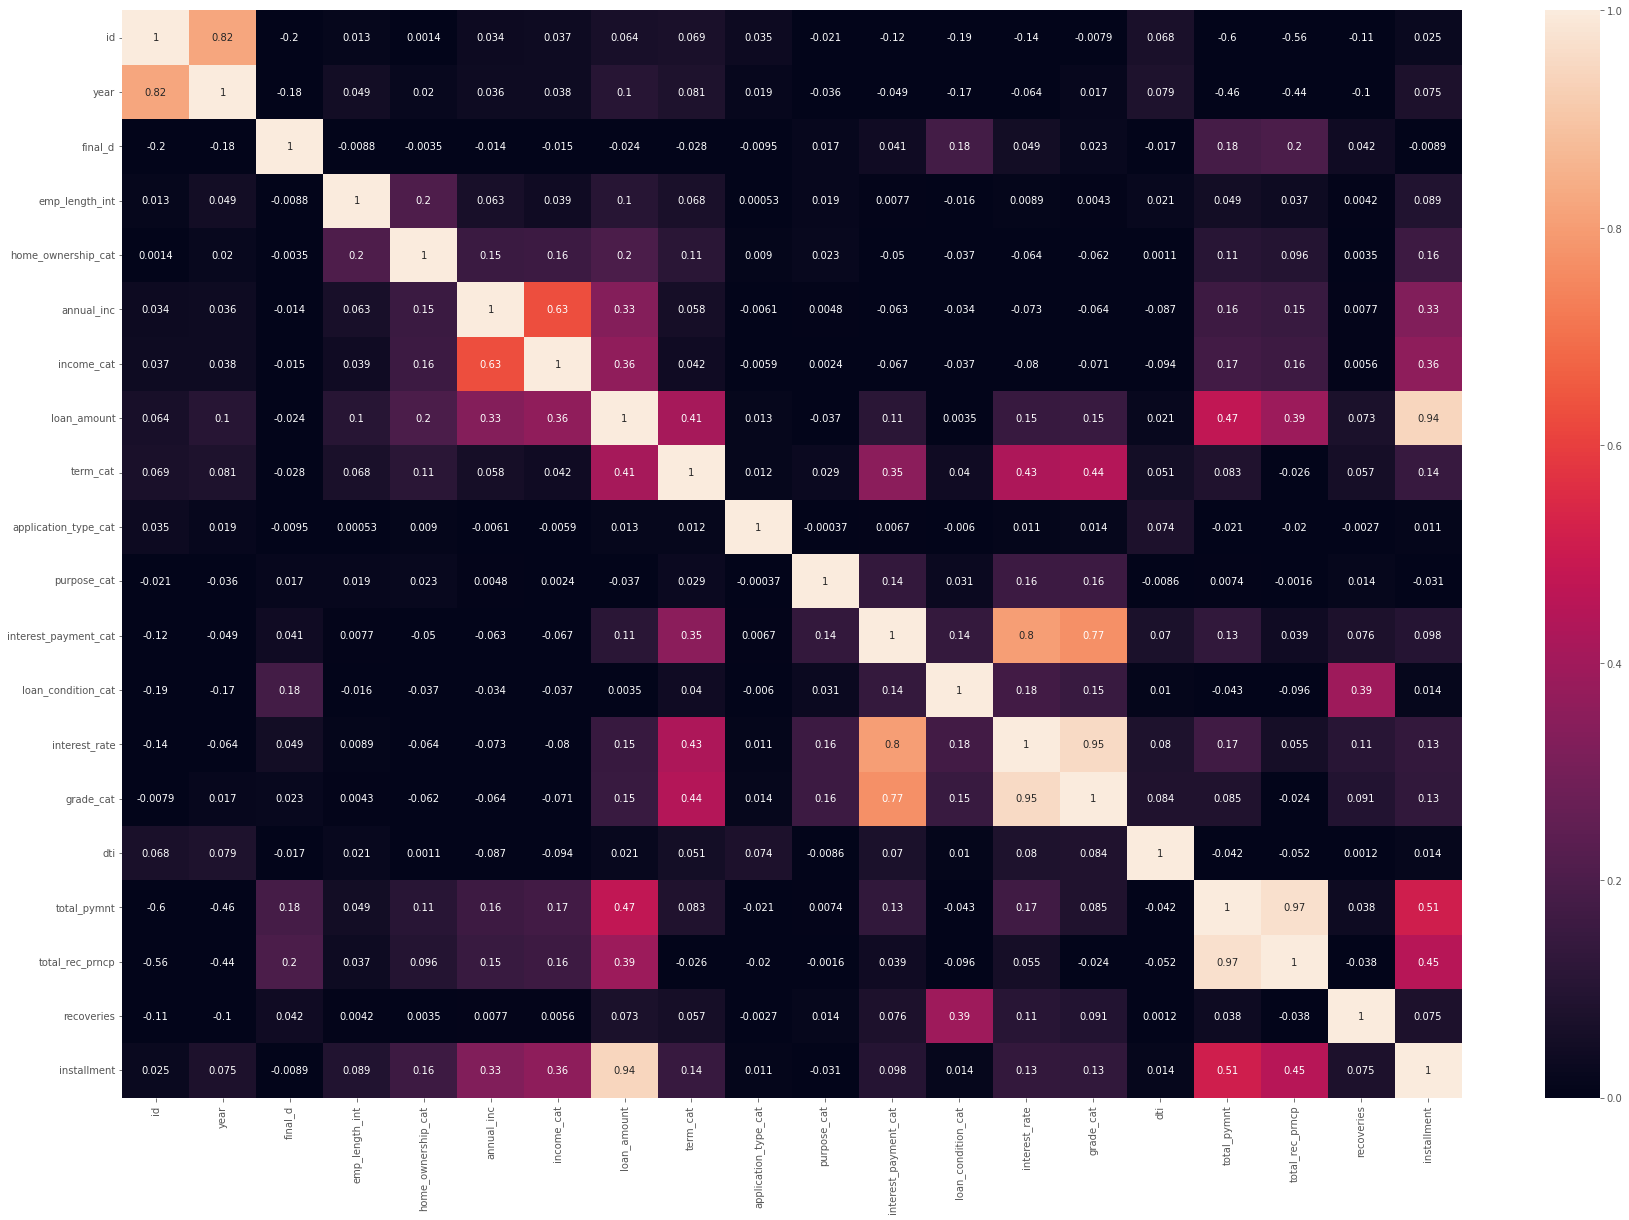

In [77]:
# Heatmap was used to see feature correlelation
corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Based on the heatmap above I found out that final_d, interest_payment_cat, interest_rate, and recoveries have postive correletion to loan_condition_cat.

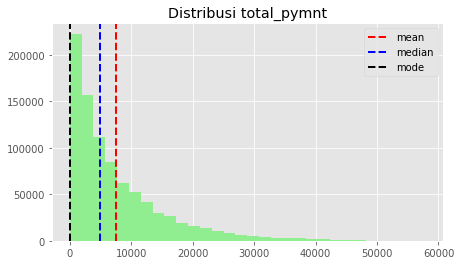

Mean:  7558.8266836428165
Median:  4894.999117
Modus : 0.0
Skewness: 1.7888936291259823


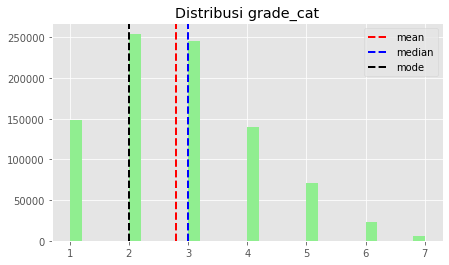

Mean:  2.798402937189183
Median:  3.0
Modus : 2
Skewness: 0.5832626238191938


In [78]:
# Visualization for payment distribution

for column in ['total_pymnt', 'grade_cat']:
    a = df[column]
    a.hist(bins=30, figsize=(7,4), color='lightgreen')
    plt.axvline(a.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(a.median(), color='blue', linestyle='dashed', linewidth=2, label='median')
    plt.axvline(a.mode()[0], color='black', linestyle='dashed', linewidth=2, label='mode')
    plt.legend()
    plt.title(f'Distribusi {column}')
    plt.show()
    print('Mean: ', a.mean())
    print('Median: ', a.median())
    print('Modus :', a.mode()[0])
    print('Skewness:', a.skew())

From the graph above it could be seen that total payment, and grade cat were not normally distributed

Text(0.5, 0, 'Loan Amount')

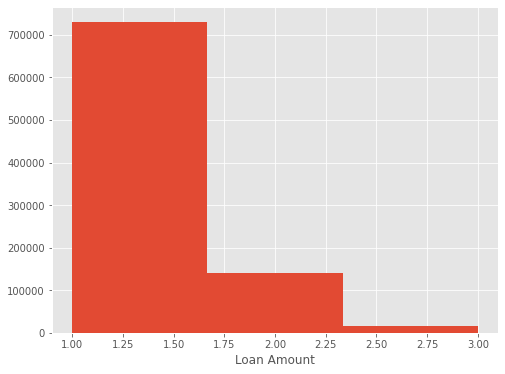

In [79]:
plt.figure(figsize=(8, 6))
df.income_cat.hist(bins=df.income_cat.nunique())
plt.xlabel('Loan Amount')

From the barplot above it aslo can be seen that loand amount were not normally distributed

Index(['issue_d', 'home_ownership', 'income_category', 'term',
       'application_type', 'purpose', 'interest_payments', 'loan_condition',
       'grade', 'region'],
      dtype='object')


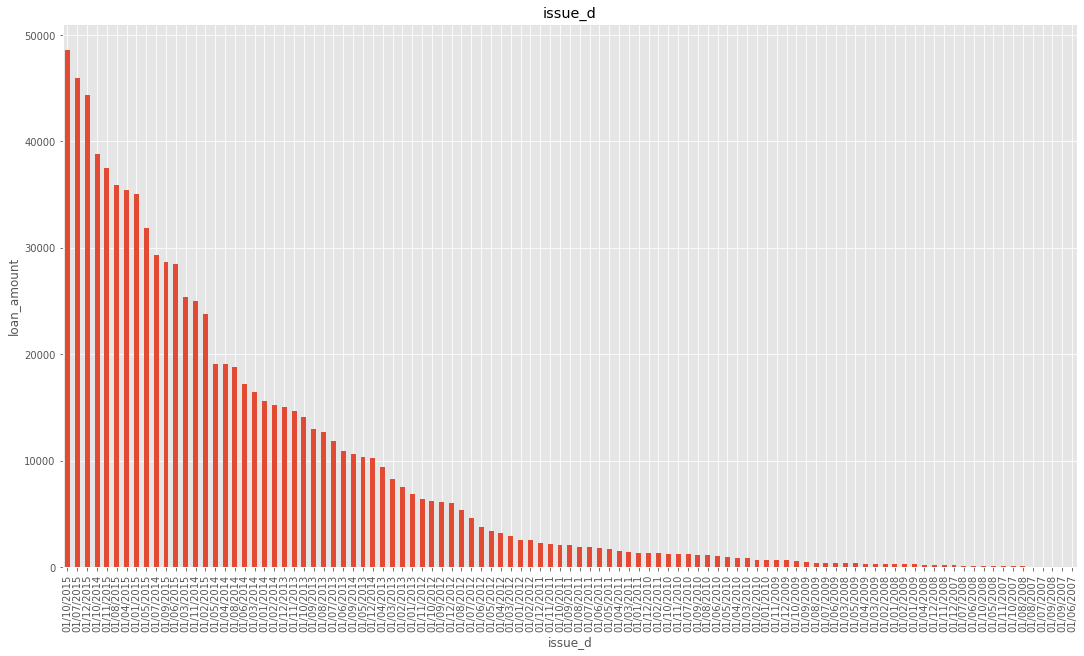

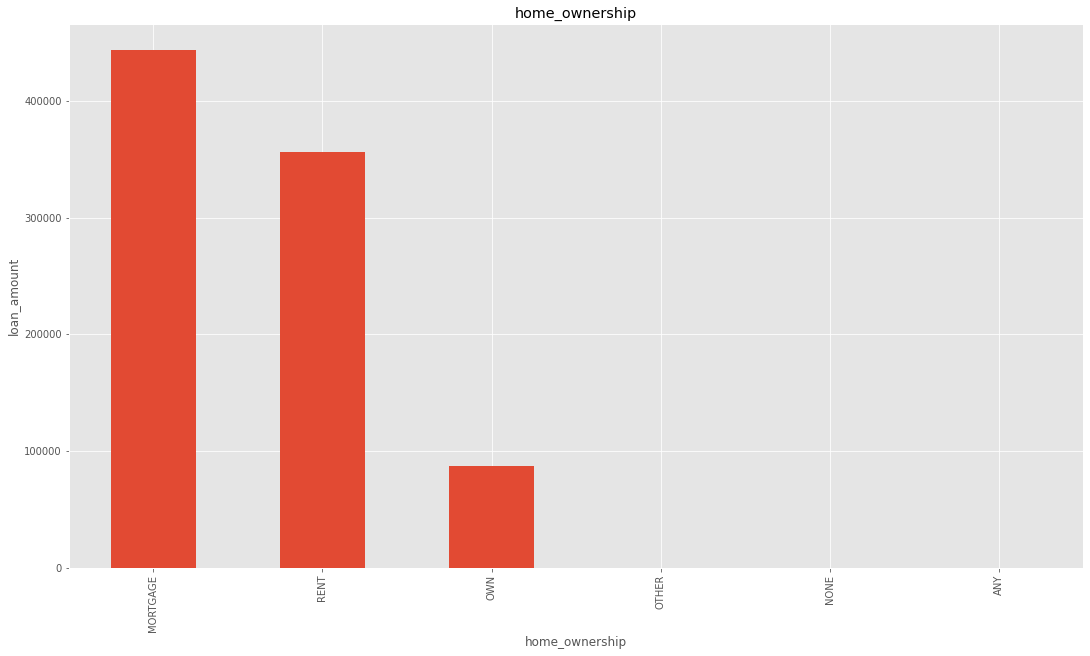

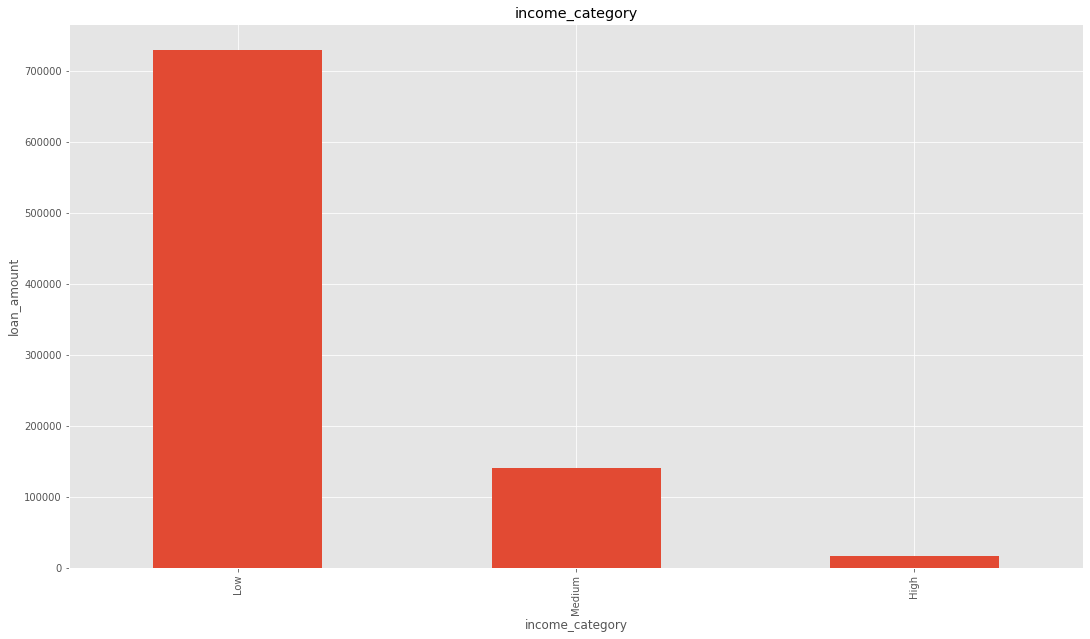

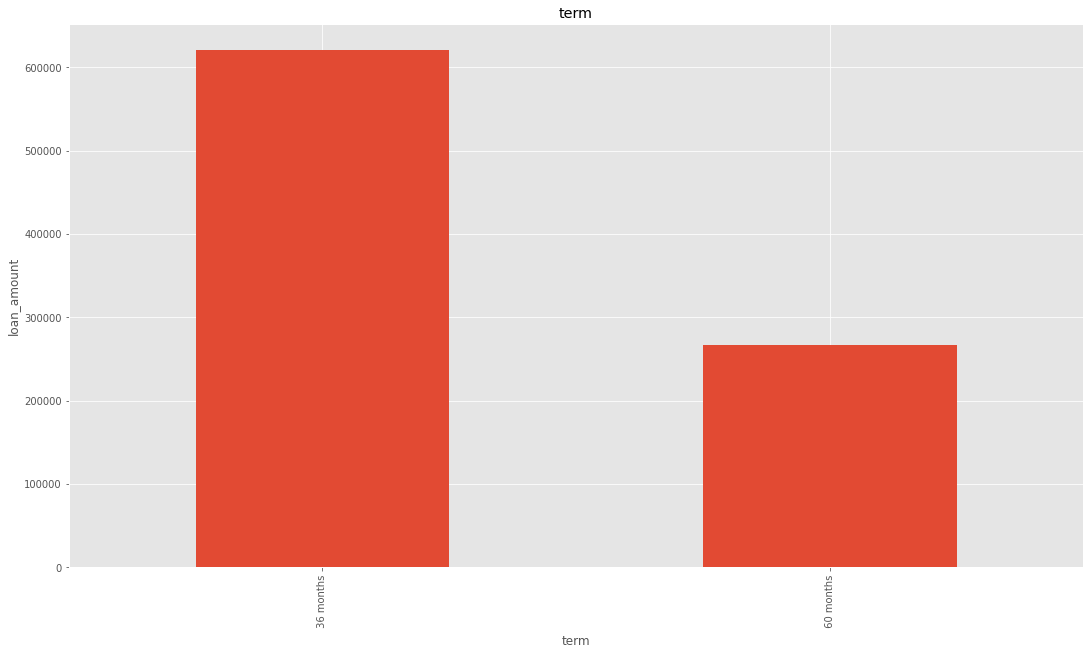

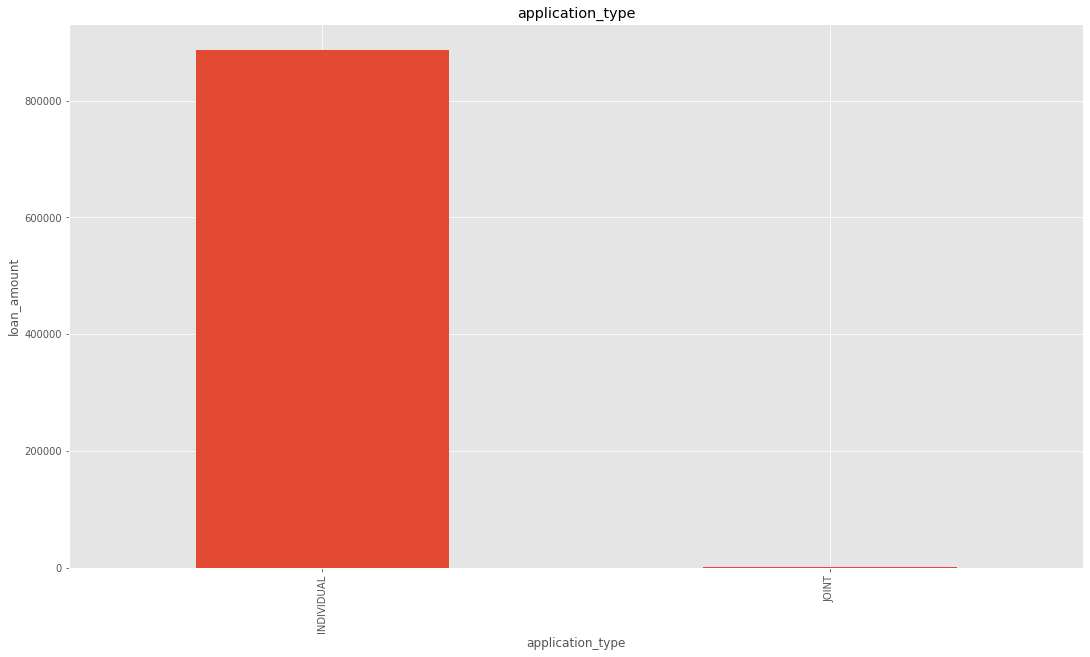

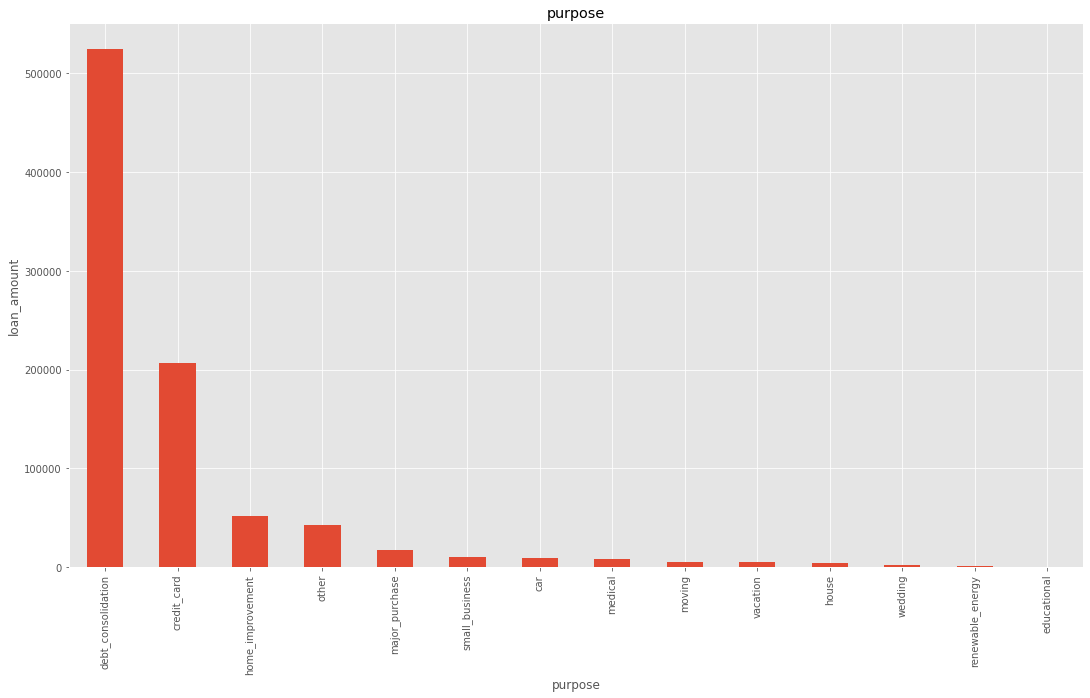

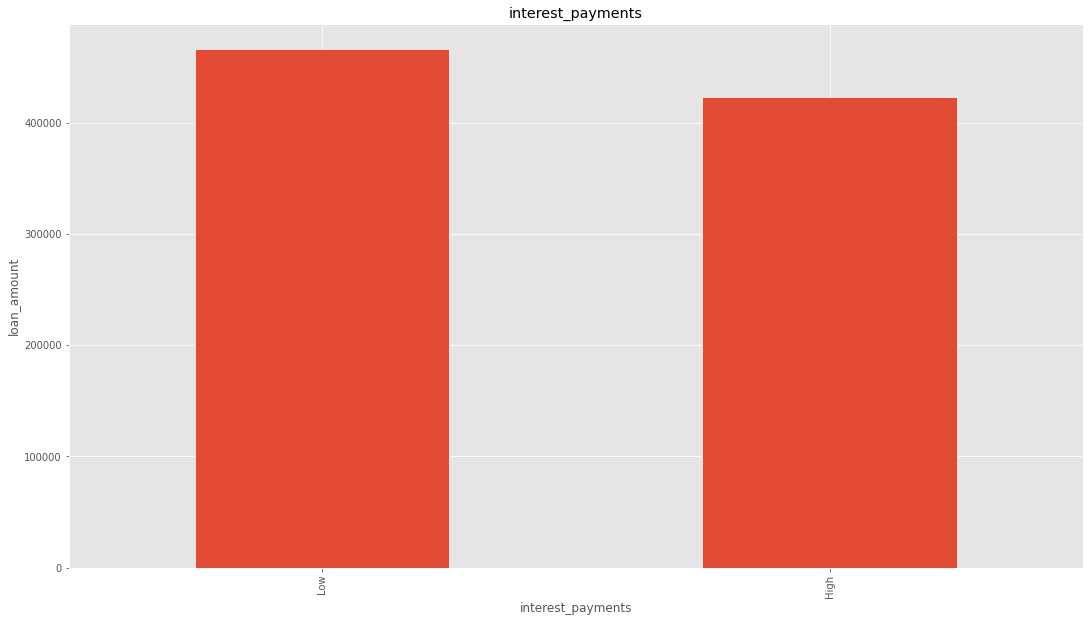

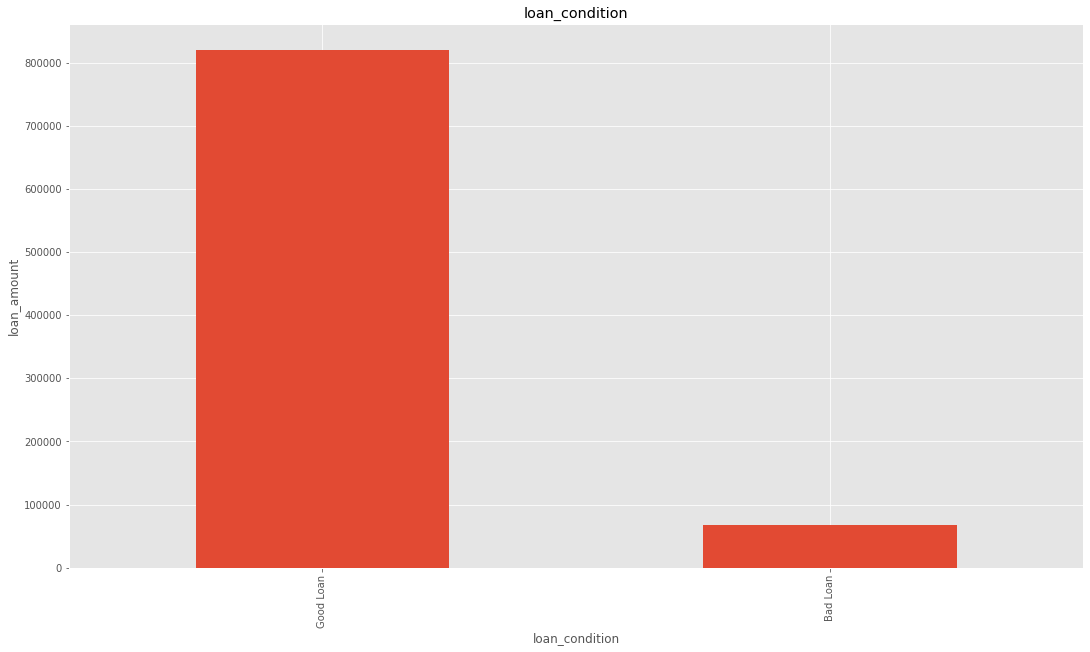

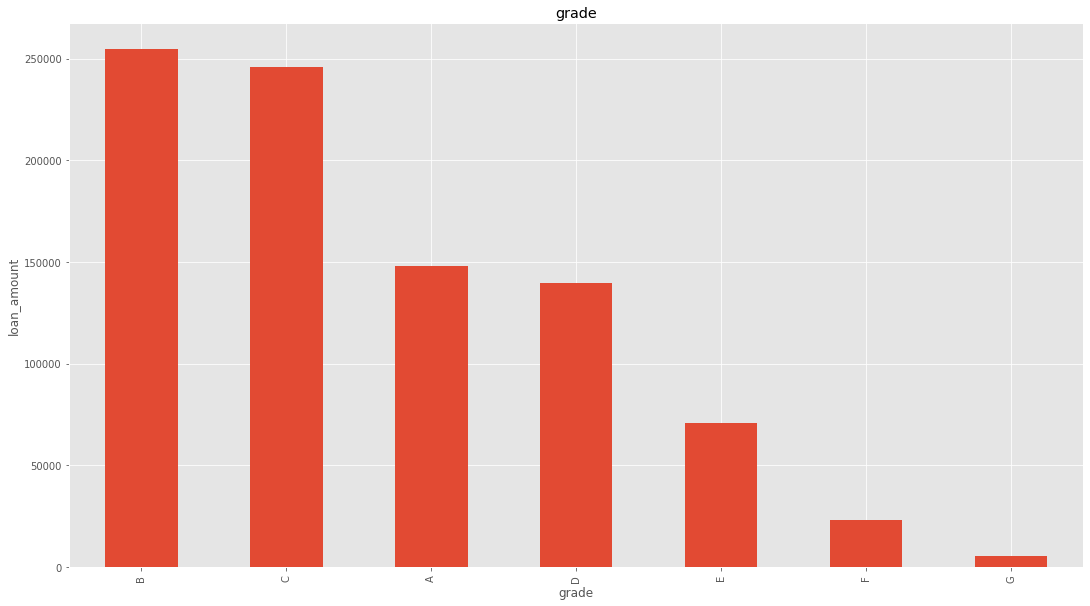

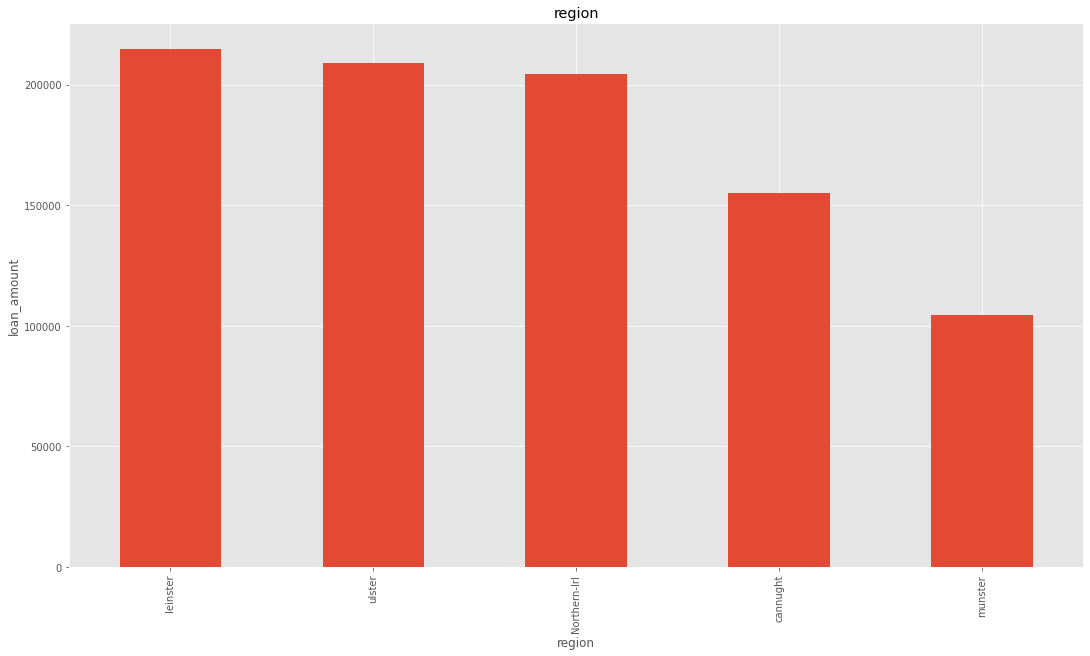

In [80]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(40,10))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("loan_amount")
    plt.title(column)

- First graph above was explaining that loan amount was increasing from each year
- In the second graph was telling that loan amount mostly used for mortgage, rent, and own
- The third grap was showed that those who have highest loan amount are the borrower who have low income and the gap between low, medium and high income in term of the behaviour they borrow money was high.
- Fourth graph was telling that most borrower who borrow more than 600.000 were in 36 months term of payment
- In the fifth graph was explaining that more than 800.0000 loan amount mostly proposed by individual
- Sixth graph was telling that the top three loan amount were purposely borrowed for debt consolidation, credit card, and home improvement.
- The seventh graph was showed that most loan amount were proposed in low interest rate.
- In the eighth graph was showed that most loan amounts above 800.000 were classified in good loan
- The ninth graph was telling that the top three amount in term of grades were consisting of grade B loan, grade C loan and grade A loan respectively.
- The tenth graph was showing loan amount among the regions and it showed that the top three amount were located in leinster, ulster, and northern-irl.

In [81]:
# This code was used to see features in the dataset
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

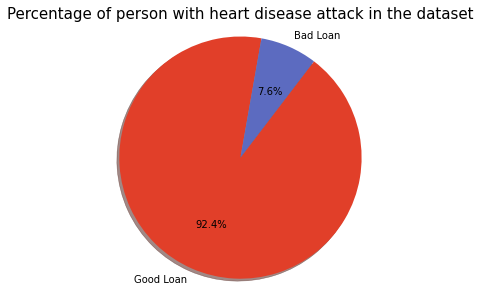

In [82]:
# This function was used to see percentage of loan condition
heart=Counter(df['loan_condition'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#E13F29", "#5c6bc0"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of person with heart disease attack in the dataset", fontsize=15)
plt.show()
# fig = px.pie(df, names='output', title='Percentage of person with heart disease present in the dataset')
# fig.show()

The pie chart above was shoId that 92.4 % target varible was good loan and the 7.6 % of it was bad loan. This was clearly imbalanced data that needs to be handled to avoid machine learning to be properly learn from the majority of the data which in this case 92.4 % of good loan.

In [83]:
# Seleksi fitur dan membuat copy dataset agar tidak perlu melakukan re-load jika terjadi perubahan pada dataset
df_copy = df
df_copy

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


### Splittig for Inference model

In [84]:
# splitting the dataset for model inference
data_inf = df_copy.sample(10, random_state=17)
data_inf.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
309745,26779697,2014,01/09/2014,1122014,10.00,OWN,2,Low,90000,1,...,0,15.61,D,4,18.33,13885.44907,13375.00,0.0,467.66,Northern-Irl
722330,51076399,2015,01/06/2015,1012016,4.00,RENT,1,Low,54000,1,...,0,11.53,B,2,27.58,4142.17000,2412.14,0.0,594.21,leinster
886181,37790171,2015,01/01/2015,1012016,7.00,RENT,1,Low,55000,1,...,0,12.39,C,3,20.36,7850.54000,6654.13,0.0,434.22,ulster
50432,9696242,2013,01/12/2013,1012016,6.05,RENT,1,Low,48000,1,...,0,11.99,B,2,12.48,12453.75000,9835.38,0.0,498.15,ulster
374357,18454623,2014,01/06/2014,1012016,1.00,RENT,1,Low,60000,1,...,0,10.15,B,2,11.54,9217.33000,7350.64,0.0,485.07,Northern-Irl


In [85]:
cateogrical_cols = [cols for cols in df_copy.columns if df_copy[cols].dtypes =='object']
print('Categories', cateogrical_cols)

numeric_cols = [cols for cols in df_copy.columns if cols not in cateogrical_cols]
print('Numerics', numeric_cols)
# transform cateogrical cols to lables by label encoder



for cols in cateogrical_cols:
    le=LabelEncoder()
    le.fit(list(df_copy[cols].astype('str')))
    df_copy[cols] = le.transform(list(df_copy[cols].astype(str))) 

Categories ['issue_d', 'home_ownership', 'income_category', 'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'region']
Numerics ['id', 'year', 'final_d', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']


The code above was used to decode all of categorical features because machine learning can only process numerical features.

In [86]:
data_train_test = df_copy.drop(data_inf.index)
data_train_test.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,98,1012015,10.0,5,1,1,24000,1,...,0,10.65,1,2,27.65,5861.071414,5000.00,0.00,162.87,3
1,1077430,2011,98,1042013,0.5,5,1,1,30000,1,...,1,15.27,2,3,1.00,1008.710000,456.46,117.08,59.83,2
2,1077175,2011,98,1062014,10.0,5,1,1,12252,1,...,0,15.96,2,3,8.72,3003.653644,2400.00,0.00,84.33,1
3,1076863,2011,98,1012015,10.0,5,1,1,49200,1,...,0,13.49,2,3,20.00,12226.302210,10000.00,0.00,339.31,4
4,1075358,2011,98,1012016,1.0,5,1,1,80000,1,...,0,12.69,1,2,17.94,3242.170000,2233.10,0.00,67.79,4


In [87]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,26779697,2014,01/09/2014,1122014,10.00,OWN,2,Low,90000,1,...,0,15.61,D,4,18.33,13885.44907,13375.00,0.0,467.66,Northern-Irl
1,51076399,2015,01/06/2015,1012016,4.00,RENT,1,Low,54000,1,...,0,11.53,B,2,27.58,4142.17000,2412.14,0.0,594.21,leinster
2,37790171,2015,01/01/2015,1012016,7.00,RENT,1,Low,55000,1,...,0,12.39,C,3,20.36,7850.54000,6654.13,0.0,434.22,ulster
3,9696242,2013,01/12/2013,1012016,6.05,RENT,1,Low,48000,1,...,0,11.99,B,2,12.48,12453.75000,9835.38,0.0,498.15,ulster
4,18454623,2014,01/06/2014,1012016,1.00,RENT,1,Low,60000,1,...,0,10.15,B,2,11.54,9217.33000,7350.64,0.0,485.07,Northern-Irl


In [88]:
# Splitting the data betIen independent varianle dan dependent variabele, in this regards independent variable was loan condition
x = data_train_test.drop('loan_condition_cat', axis=1)
y = data_train_test['loan_condition_cat']
x.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,98,1012015,10.0,5,1,1,24000,1,...,1,10.65,1,2,27.65,5861.071414,5000.00,0.00,162.87,3
1,1077430,2011,98,1042013,0.5,5,1,1,30000,1,...,0,15.27,2,3,1.00,1008.710000,456.46,117.08,59.83,2
2,1077175,2011,98,1062014,10.0,5,1,1,12252,1,...,1,15.96,2,3,8.72,3003.653644,2400.00,0.00,84.33,1
3,1076863,2011,98,1012015,10.0,5,1,1,49200,1,...,1,13.49,2,3,20.00,12226.302210,10000.00,0.00,339.31,4
4,1075358,2011,98,1012016,1.0,5,1,1,80000,1,...,1,12.69,1,2,17.94,3242.170000,2233.10,0.00,67.79,4


#### Splitting Dataset

Splitting dataset was done to prevent data leak in process of machine learning metric evaluation.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (709895, 29)
Test Size : (177474, 29)


In [90]:
# Checking to see what's data in X_train after splitting
X_train.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
467281,68476092,2015,102,1012016,3.00,1,3,1,55000,1,...,1,11.48,1,2,14.10,0.00000,0.00,0.0,118.68,1
303168,28112166,2014,74,1012016,8.00,5,1,1,56500,1,...,1,12.49,1,2,14.21,3010.50000,2231.87,0.0,200.70,2
803105,44137750,2015,23,1012016,6.05,5,1,1,82000,1,...,1,17.57,3,4,22.67,9732.36000,6098.34,0.0,1078.12,0
50786,9685452,2013,100,1022015,10.00,1,3,1,62000,1,...,1,17.57,3,4,25.22,16503.26101,14000.00,0.0,503.12,4
325886,24053907,2014,65,1012016,10.00,4,2,2,102000,2,...,1,13.35,2,3,16.34,10760.15000,6061.91,0.0,632.95,2


#### Handling Missing Value

Before the dataset that has been splitted got processed in machine learning. I need to make sure all of the data was not containing missing value, this was crucial to prevent error. 

In [91]:
X_train.isna().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

From the code that was run above it could be seen that no missing value detected in independent variables

In [92]:
y_train.isna().sum()

0

From the code that was run above it could be seen that no missing value that was found in dependent variable or target variable.

In [93]:
X_test.isna().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

From the X_test it was also can be seen that there was no missing value detected

In [94]:
y_test.isna().sum()

0

From the y_test it was also can be seen that there was no missing value detected. After all related variables have been checked and did not contain missing value I can go to the next step to prepare the data for the machine learning processing.

### Splitting Categorical and Numerical Data

In [95]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns : ['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership', 'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat', 'loan_amount', 'term', 'term_cat', 'application_type', 'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments', 'interest_payment_cat', 'loan_condition', 'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment', 'region']
Categorical Columns : []


In [96]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
467281,68476092,2015,102,1012016,3.00,1,3,1,55000,1,...,1,11.48,1,2,14.10,0.00000,0.00,0.0,118.68,1
303168,28112166,2014,74,1012016,8.00,5,1,1,56500,1,...,1,12.49,1,2,14.21,3010.50000,2231.87,0.0,200.70,2
803105,44137750,2015,23,1012016,6.05,5,1,1,82000,1,...,1,17.57,3,4,22.67,9732.36000,6098.34,0.0,1078.12,0
50786,9685452,2013,100,1022015,10.00,1,3,1,62000,1,...,1,17.57,3,4,25.22,16503.26101,14000.00,0.0,503.12,4
325886,24053907,2014,65,1012016,10.00,4,2,2,102000,2,...,1,13.35,2,3,16.34,10760.15000,6061.91,0.0,632.95,2


### Implementing Principle Component Analysis for Dimensionality Reduction

The idea of PCA was basically to reduce the number of features from high dimensional dataset. This technique was gonna be beneficial to increase machine learning performance

In [97]:
# Defining the PCA

pca = PCA()
pca.fit(X_train)

PCA()

### Defining pipiline

This part was really important because it would simplify the workflow of data scaling before it process in machine learning. 

In [98]:
numeric_features = ['emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']
numeric_features2 = ['home_ownership', 'income_category', 'term', 'application_type', 'purpose', 'interest_payments', 'grade', 'region']

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2),
    ]
)

In [99]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

The code above was run to define 'SMOTE' as a technique for imbalanced target variable.

In [100]:
pipe = Pipeline([("prep", preprocessor),('PCA_lr', PCA(n_components=10)) ,("Logistic", LogisticRegression())])
pipe.fit(X_resampled,y_resampled)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp_length_int',
                                                   'home_ownership_cat',
                                                   'annual_inc', 'income_cat',
                                                   'loan_amount', 'term_cat',
                                                   'application_type_cat',
                                                   'purpose_cat',
                                                   'interest_payment_cat',
                                                   'interest_rate', 'grade_cat',
                                                   'dti', 'total_pymnt',
                                                   'total_rec_prncp',
                                                   'recoveries',
                                                   'installment']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   MinMaxScaler())]),
                                                  ['home_ownership',
                                                   'income_category', 'term',
                                                   'application_type',
                                                   'purpose',
                                                   'interest_payments', 'grade',
                                                   'region'])])),
                ('PCA_lr', PCA(n_components=10)),
                ('Logistic', LogisticRegression())])

The pipeline above was describing the processes of data sclaling, and dimensionality reduction before it can be processed in machine learning. As what I have mentioned earlier building data pipeline would make data preprocessinng esier to be consumed in machine learning in this regards was logistic regression.

### Model Evaluation Logistic Regression by Handling imbalanced Data

This was the metric evaluation for logistic regression after handling the imbalancedd with 'SMOTE'.

In [101]:
y_train_pred=pipe.predict(X_resampled)
y_test_pred=pipe.predict(X_test)

In [102]:
accuracy_score(y_test,y_test_pred)

0.8096791642719497

In [103]:
# This code was run to see the classification report of Logistic Regression model 

pipe.fit(X_resampled, y_resampled)

y_train_pred = pipe.predict(X_resampled)
y_test_pred = pipe.predict(X_test)

print(classification_report(y_resampled, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    655837
           1       0.84      0.81      0.82    655837

    accuracy                           0.83   1311674
   macro avg       0.83      0.83      0.83   1311674
weighted avg       0.83      0.83      0.83   1311674

              precision    recall  f1-score   support

           0       0.94      0.84      0.89    164104
           1       0.17      0.38      0.23     13370

    accuracy                           0.81    177474
   macro avg       0.55      0.61      0.56    177474
weighted avg       0.88      0.81      0.84    177474



From the metric evaluation above it showed that the model was in a good fit for label 0 but extremely overfitting the metric evaluation precision, recall, and f1-score for label 1.

### Logistic Regression Without Handling imbalanced Dataset

In [104]:
pipe = Pipeline([("prep", preprocessor),('PCA_lr', PCA(n_components=10)), ("Logistic", LogisticRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp_length_int',
                                                   'home_ownership_cat',
                                                   'annual_inc', 'income_cat',
                                                   'loan_amount', 'term_cat',
                                                   'application_type_cat',
                                                   'purpose_cat',
                                                   'interest_payment_cat',
                                                   'interest_rate', 'grade_cat',
                                                   'dti', 'total_pymnt',
                                                   'total_rec_prncp',
                                                   'recoveries',
                                                   'installment']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   MinMaxScaler())]),
                                                  ['home_ownership',
                                                   'income_category', 'term',
                                                   'application_type',
                                                   'purpose',
                                                   'interest_payments', 'grade',
                                                   'region'])])),
                ('PCA_lr', PCA(n_components=10)),
                ('Logistic', LogisticRegression())])

In [105]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

### Model Evaluation

In [106]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.9238507103163144
accuracy score test :  0.9246650213552408


In [107]:
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    655837
           1       0.00      0.00      0.00     54058

    accuracy                           0.92    709895
   macro avg       0.46      0.50      0.48    709895
weighted avg       0.85      0.92      0.89    709895

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    164104
           1       0.00      0.00      0.00     13370

    accuracy                           0.92    177474
   macro avg       0.46      0.50      0.48    177474
weighted avg       0.86      0.92      0.89    177474



The information above was telling that the logistic regression was in a good fit for label 0. Otherwise it showed worse overfitting for the metric evaluation precision, recall, f1-score for label 1. This result has already shown that running 'SMOTE' for imbalanced data was working to improve the machine learning metrics evaluation.

### Conclusion

The result of this logistic regression research showed that the accuracy without handling imbalanced dataset was higher than the accuracy by handling imbalancedd dataset. Otherwise the technique of handling the imbalancedd dataset was working to teach the lowest proportion of target variable to learn from the training. It was shown in the metric valuation with handling imbalanced data which showed that the label one in data training have 80% of accuracy. Even-though it was still overfitting because the test accuracy was at 79 %. But it was better because in the specific metric valuation such as precision and recall that have score at 0.82 and 0.80 respectively and still overfitting because the precision and recall in the test were at 0.15 and 0.49.

If I could sum it up regarding the performance of logistic regression to predict label in imbalanced dataset. I could say logistic regression has good performance and it could be seen in the accuracy score. But since the accuracy it's not the only metric valuation precision and recall can also be considered and it showed overfitting in both metrics. In this research metric valuation that have to be concerned was recall because recall was focusig on false negative or type two error. In short recall would be really strict to detect bad loan rather than precission metric.